In [8]:
import torch
from torch import nn
from torch.autograd import Variable
import matplotlib.pyplot as plt
import numpy as np
 
# 假数据
n_data = torch.ones(100, 2)         # 数据的基本形态
x0 = torch.normal(2*n_data, 1)      # 类型0 x data (tensor), shape=(100, 2)
y0 = torch.zeros(100)               # 类型0 y data (tensor), shape=(100, 1)
x1 = torch.normal(-2*n_data, 1)     # 类型1 x data (tensor), shape=(100, 1)
y1 = torch.ones(100)                # 类型1 y data (tensor), shape=(100, 1)
 
# 注意 x, y 数据的数据形式是一定要像下面一样 (torch.cat 是在合并数据)
x = torch.cat((x0, x1), 0).type(torch.FloatTensor)  # FloatTensor = 32-bit floating
y = torch.cat((y0, y1), 0).type(torch.FloatTensor)    # LongTensor = 64-bit integer

# --------------------- 
# 作者：Liam Coder 
# 来源：CSDN 
# 原文：https://blog.csdn.net/out_of_memory_error/article/details/81275651 
# 版权声明：本文为博主原创文章，转载请附上博文链接！

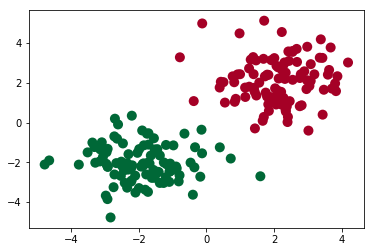

In [3]:
plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy(), s=100, lw=0, cmap='RdYlGn')
plt.show()

In [5]:
class LogisticRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.lr = nn.Linear(2, 1)
        self.sm = nn.Sigmoid()

    def forward(self, x):
        x = self.lr(x)
        x = self.sm(x)
        return x

In [6]:
logistic_model = LogisticRegression()
if torch.cuda.is_available():
    logistic_model.cuda()

In [15]:
# 定义损失函数和优化器
criterion = nn.BCELoss()  # Binary Cross Entropy
# 使用梯度更新參數的策略 > optimizer
optimizer = torch.optim.SGD(logistic_model.parameters(), lr=1e-3, momentum=0.9)

In [16]:
# 开始训练
for epoch in range(1000):
    if torch.cuda.is_available():
        x_data = Variable(x).cuda()
        y_data = Variable(y).cuda()
    else:
        x_data = Variable(x)
        y_data = Variable(y)

    out = logistic_model(x_data)  # 0-1之間的數值
    loss = criterion(out, y_data)
    print_loss = loss.data.item()
    mask = out.ge(0.5).float()  # 以0.5为阈值进行分类 (greater equal to)
    correct = (mask == y_data).sum()  # 计算正确预测的样本个数
    acc = correct.item() / x_data.size(0)  # 计算精度
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    # 每隔20轮打印一下当前的误差和精度
    if (epoch + 1) % 20 == 0:
        print('*'*10)
        print('epoch {}'.format(epoch+1)) # 训练轮数
        print('loss is {:.4f}'.format(print_loss))  # 误差
        print('acc is {:.4f}'.format(acc))  # 精度

/home/rossleecooloh/.pyenv/versions/3.6.6/lib/python3.6/site-packages/torch/nn/functional.py:2016: UserWarning: Using a target size (torch.Size([200])) that is different to the input size (torch.Size([200, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))


**********
epoch 20
loss is 0.5038
acc is 100.0000
**********
epoch 40
loss is 0.3313
acc is 100.0000
**********
epoch 60
loss is 0.2420
acc is 100.0000
**********
epoch 80
loss is 0.1928
acc is 100.0000
**********
epoch 100
loss is 0.1621
acc is 100.0000
**********
epoch 120
loss is 0.1410
acc is 100.0000
**********
epoch 140
loss is 0.1255
acc is 100.0000
**********
epoch 160
loss is 0.1136
acc is 100.0000
**********
epoch 180
loss is 0.1042
acc is 100.0000
**********
epoch 200
loss is 0.0965
acc is 100.0000
**********
epoch 220
loss is 0.0900
acc is 100.0000
**********
epoch 240
loss is 0.0846
acc is 100.0000
**********
epoch 260
loss is 0.0799
acc is 100.0000
**********
epoch 280
loss is 0.0759
acc is 100.0000
**********
epoch 300
loss is 0.0723
acc is 100.0000
**********
epoch 320
loss is 0.0692
acc is 100.0000
**********
epoch 340
loss is 0.0663
acc is 100.0000
**********
epoch 360
loss is 0.0638
acc is 100.0000
**********
epoch 380
loss is 0.0615
acc is 100.0000
**********
epoch

**********
epoch 3180
loss is 0.0187
acc is 100.0000
**********
epoch 3200
loss is 0.0187
acc is 100.0000
**********
epoch 3220
loss is 0.0186
acc is 100.0000
**********
epoch 3240
loss is 0.0186
acc is 100.0000
**********
epoch 3260
loss is 0.0185
acc is 100.0000
**********
epoch 3280
loss is 0.0185
acc is 100.0000
**********
epoch 3300
loss is 0.0184
acc is 100.0000
**********
epoch 3320
loss is 0.0184
acc is 100.0000
**********
epoch 3340
loss is 0.0183
acc is 100.0000
**********
epoch 3360
loss is 0.0183
acc is 100.0000
**********
epoch 3380
loss is 0.0182
acc is 100.0000
**********
epoch 3400
loss is 0.0182
acc is 100.0000
**********
epoch 3420
loss is 0.0181
acc is 100.0000
**********
epoch 3440
loss is 0.0181
acc is 100.0000
**********
epoch 3460
loss is 0.0180
acc is 100.0000
**********
epoch 3480
loss is 0.0180
acc is 100.0000
**********
epoch 3500
loss is 0.0179
acc is 100.0000
**********
epoch 3520
loss is 0.0179
acc is 100.0000
**********
epoch 3540
loss is 0.0179
acc is 10

**********
epoch 6400
loss is 0.0140
acc is 100.0000
**********
epoch 6420
loss is 0.0140
acc is 100.0000
**********
epoch 6440
loss is 0.0140
acc is 100.0000
**********
epoch 6460
loss is 0.0140
acc is 100.0000
**********
epoch 6480
loss is 0.0140
acc is 100.0000
**********
epoch 6500
loss is 0.0139
acc is 100.0000
**********
epoch 6520
loss is 0.0139
acc is 100.0000
**********
epoch 6540
loss is 0.0139
acc is 100.0000
**********
epoch 6560
loss is 0.0139
acc is 100.0000
**********
epoch 6580
loss is 0.0139
acc is 100.0000
**********
epoch 6600
loss is 0.0139
acc is 100.0000
**********
epoch 6620
loss is 0.0139
acc is 100.0000
**********
epoch 6640
loss is 0.0138
acc is 100.0000
**********
epoch 6660
loss is 0.0138
acc is 100.0000
**********
epoch 6680
loss is 0.0138
acc is 100.0000
**********
epoch 6700
loss is 0.0138
acc is 100.0000
**********
epoch 6720
loss is 0.0138
acc is 100.0000
**********
epoch 6740
loss is 0.0138
acc is 100.0000
**********
epoch 6760
loss is 0.0137
acc is 10

**********
epoch 9560
loss is 0.0121
acc is 100.0000
**********
epoch 9580
loss is 0.0121
acc is 100.0000
**********
epoch 9600
loss is 0.0121
acc is 100.0000
**********
epoch 9620
loss is 0.0121
acc is 100.0000
**********
epoch 9640
loss is 0.0120
acc is 100.0000
**********
epoch 9660
loss is 0.0120
acc is 100.0000
**********
epoch 9680
loss is 0.0120
acc is 100.0000
**********
epoch 9700
loss is 0.0120
acc is 100.0000
**********
epoch 9720
loss is 0.0120
acc is 100.0000
**********
epoch 9740
loss is 0.0120
acc is 100.0000
**********
epoch 9760
loss is 0.0120
acc is 100.0000
**********
epoch 9780
loss is 0.0120
acc is 100.0000
**********
epoch 9800
loss is 0.0120
acc is 100.0000
**********
epoch 9820
loss is 0.0120
acc is 100.0000
**********
epoch 9840
loss is 0.0120
acc is 100.0000
**********
epoch 9860
loss is 0.0120
acc is 100.0000
**********
epoch 9880
loss is 0.0119
acc is 100.0000
**********
epoch 9900
loss is 0.0119
acc is 100.0000
**********
epoch 9920
loss is 0.0119
acc is 10

In [11]:
print(x.shape)
print(y.shape)

torch.Size([200, 2])
torch.Size([200])
